# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [296]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [297]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

<AxesSubplot:xlabel='Edad', ylabel='Retrasos'>

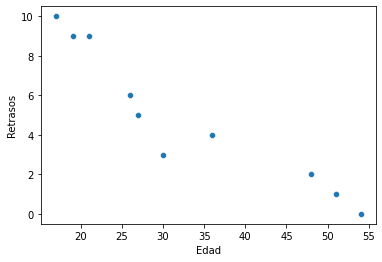

In [298]:
sns.scatterplot(data=student_data, x='Edad', y='Retrasos')

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

A medida de que aumenta la edad disminuye el número de retrasos, o viceversa

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [299]:
# La covarianza mide el grado en el que 2 variables cambian juntas.
# La correlación mide la fuerza y dirección de la relación lineal entre 2 variables. Es una versión estandarizada de la covarianza.

In [300]:
cov_matrix = student_data.cov()
cov_XY = np.array(cov_matrix)[0,1]
cov_XY

# El valor negativo indica que ha medida que aumenta una variable la otra disminuye.

-45.56666666666666

In [301]:
corr_matrix = student_data.corr()
corr_XY = np.array(corr_matrix)[0,1]
corr_XY

# El valor negativo muy cercano a -1 indica una fuerte relación inversa entre ambas variables.

-0.9391626886887121

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [302]:
X = student_data[['Edad']]    # Variable dependiente
Y = student_data['Retrasos']    # Variable independiente

lr = LinearRegression()
lr.fit(X,Y)

Y_pred = lr.predict(X)

intercept = lr.intercept_
slope = lr.coef_[0]
slope

-0.2428207709159809

Grafica tu modelo de regresión en tu diagrama de dispersión.

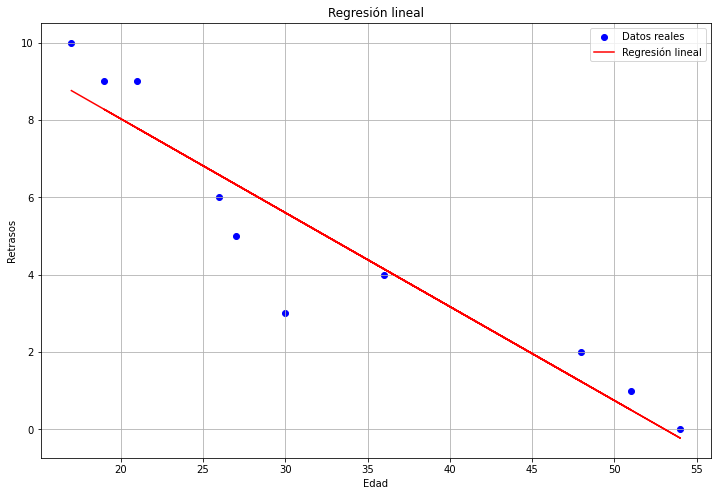

In [303]:
plt.figure(figsize=(12,8))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X.values, Y_pred, color='red', label='Regresión lineal')
plt.xlabel('Edad')
plt.grid()
plt.ylabel('Retrasos')
plt.title('Regresión lineal')
plt.legend()
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

In [304]:
r2 = lr.score(X, Y)
r2

0.8820265558250109

In [305]:
print(type(X), type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


Se puede concluir que la Edad es un buen predictor de la tardanza ya que la puntuación del R2 es 0.88, 
lo que nos indica que aprox el 88% de la variabilidad de los retrasos pueden ser explicados por la edad,
al tratarse de un modelo de regresión lineal.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [306]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

<AxesSubplot:>

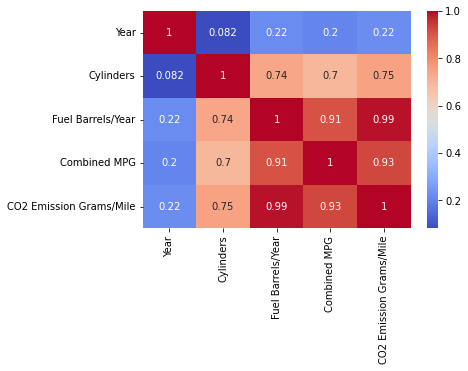

In [307]:
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'CO2 Emission Grams/Mile']
corr_matrix = np.abs(vehicles[variables].corr())
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# 'Year' es la variable menos útil
# 'Fuel Barrels/Year' es la variable más importante

<Figure size 576x288 with 0 Axes>

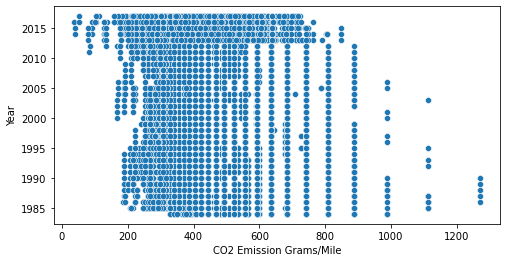

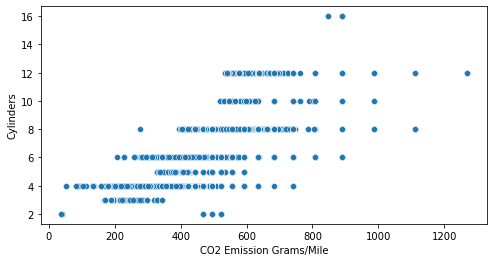

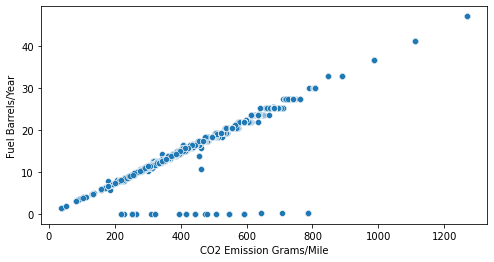

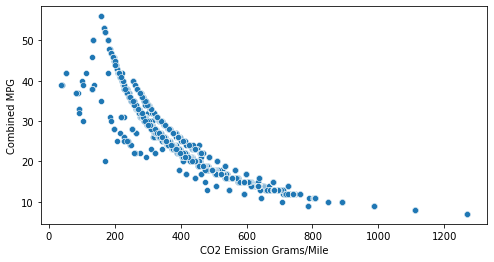

In [308]:
plt.figure(figsize=(8,4))

for var in variables[:-1]:
    plt.figure(figsize=(8,4))
    plt.subplot()
    sns.scatterplot(data=vehicles, x='CO2 Emission Grams/Mile', y=var)
    plt.show()

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [349]:
# Linear Regression for multiple independent variables
lr = LinearRegression()

# Dropping Year as there is no correlation with CO2 Emissions
X = vehicles[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG']]
Y = vehicles['CO2 Emission Grams/Mile']

# Split test / train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fitting the model
lr.fit(X_train, Y_train)

# Predicting the values given the independent variables compiled in 'X'
Y_pred_test = lr.predict(X_test)
Y_pred_train = lr.predict(X_train)

# Score of the model
score = lr.score(X_test, Y_test)
r2_test = r2_score(Y_test, Y_pred_test)
r2_train = r2_score(Y_train, Y_pred_train)
print(f'r2_test = {r2_test} \nr2_train = {r2_train}')


r2_test = 0.9765315995676027 
r2_train = 0.978661147119175


In [350]:
import statsmodels.api as sm
est = sm.OLS(Y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          6.246e+06
Date:                     Sat, 13 Jul 2024   Prob (F-statistic):                        0.00
Time:                             16:08:07   Log-Likelihood:                     -1.2576e+05
No. Observations:                    28761   AIC:                                  2.515e+05
Df Residuals:                        28758   BIC:                                  2.516e+05
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Cylinders             3.5206      0.095     36.922      0.000       3.334       3.708
Fuel Barrels/Year    25.7374      0.033    791.139      0.000      25.674      25.801
Combined MPG          0.0682      0.012      5.796      0.000       0.045       0.091
==============================================================================
Omnibus:                    70464.107   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        780982730.630
Skew:                          26.299   Prob(JB):                         0.00
Kurtosis:                     808.565   Cond. No.                         24.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

/tmp/ipykernel_1112/1177716059.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')


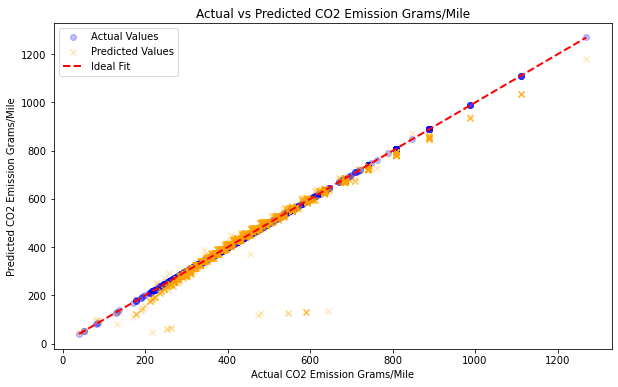

In [337]:
# Visualize the real vs predicted values with different colors
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(Y_test, Y_test, color='blue', label='Actual Values', alpha=0.25)

# Scatter plot for predicted values
plt.scatter(Y_test, Y_pred, color='orange', label='Predicted Values', marker='x', alpha=0.25)

# Plot the ideal fit line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')

plt.xlabel('Actual CO2 Emission Grams/Mile')
plt.ylabel('Predicted CO2 Emission Grams/Mile')
plt.title('Actual vs Predicted CO2 Emission Grams/Mile')
plt.legend()
plt.show()

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [311]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [312]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [313]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*